# Exploratory analysis of annual shoot

- AIM1: freq dist per each rank --> nb of shoots
- AIM2: relationship length (node) ~ length (cm)
- AIM3: relationship length(cm) ~ diameter (mm)
  
data:deruta 2020
PhD: Francesca Grisafi


In [1]:
import importnb
import sys
import pandas as pd

# Add the resolved path to sys.path
sys.path.insert(0, "../../../../Scripts")

# Import the notebooks
with importnb.Notebook():
    import Import_Dataset
    import Annual_shoot

In [2]:
file_paths = {
    'bud': "../../Data/bud.csv",
    'bud_proleptic': '../../Data/bud_proleptic.csv',
    'bud_sylleptic': '../../Data/bud_sylleptic.csv',
    'MV_bud_pro': '../../Data/MV_bud_pro.csv',
    'MV_bud_syl': '../../Data/MV_bud_syl.csv',
    'met_proleptic': '../../Data/met_proleptic.csv',
    'met_sylleptic': '../../Data/met_sylleptic.csv',
    'all_met_proleptic': '../../Data/all_met_proleptic.csv',
    'all_met_sylleptic': '../../Data/all_met_sylleptic.csv',
    'shoot': '../../Data/shoot.csv'
}

data = Import_Dataset.importdataset(**file_paths)

In [3]:
for name,dict_ in data.items():
    globals()[name] = dict_

## AIM1: freq dist per each rank --> nb of c,v,m,b, nuts, and sum of buds --------

In [4]:
freq_rank = Annual_shoot.compute_freq_rank(shoot_df=shoot, node_col="node")
print(freq_rank.head())

   nb_shoots
0          1
1          4
2          6
3          8
4          6


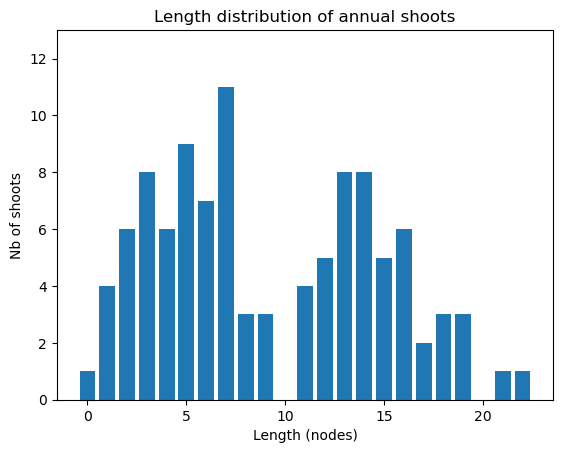

In [5]:
plt = Annual_shoot.length_distribution(freq_rank, 13)
plt.show()

## AIM2: relationship length (node) ~ length (cm)

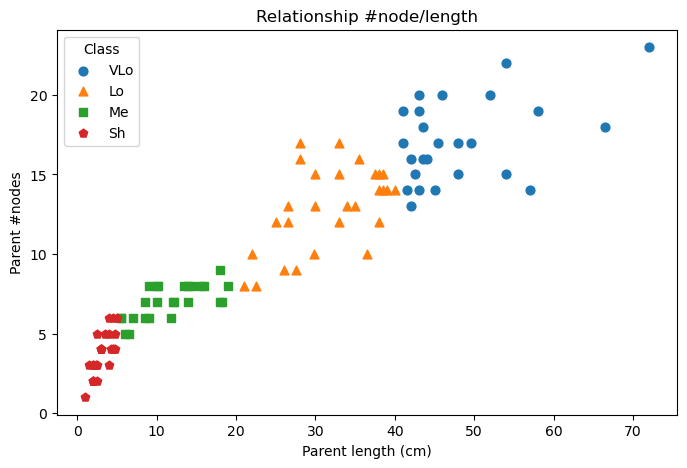

In [6]:
plt.figure(figsize=(8, 5))
plt = Annual_shoot.length_nbnodes(shoot, "class", "length", "node", 40)
plt.show()

## AIM3: relationship length(cm) ~ diameter (mm)

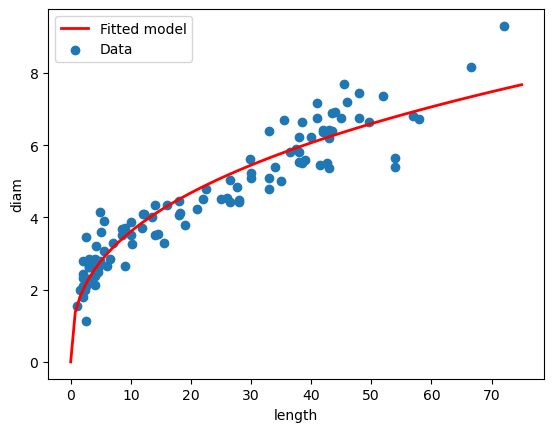

Parameters: a=1.53, b=0.37


In [7]:
Annual_shoot.len_diamet(shoot)